In [1]:
ls

customer_analysis_round_3_solution.ipynb  files_for_lab/  readme.md


# Code from Customer Analysis Round 2 (run this first)

In [5]:
import pandas as pd
import numpy as np

data=pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')    # import csv file
data.head()   

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 1. Show the dataframe shape

In [6]:
data.shape

(9134, 24)

In [7]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

## 2. Standardize Header Names

In [9]:
# lower the column names and replace whitespaces with _'s
data.columns=[column.lower().replace(' ', '_') for column in data.columns]

data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

## 3. Which columns are numerical?

In [11]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [12]:
data._get_numeric_data().columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

## 4. Which columns are categorical?

In [14]:
# we just take the numerical column names, drop them from the original dataframe,
# and we should end up with only categoricals
data.drop(columns=data._get_numeric_data().columns).columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

## 5. Check and deal with NaN values 

In [16]:
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

clean of null values!
Otherwise we would have done:

In [19]:
data.isna().sum()
round(data.isna().sum()/len(data),4)*100  # shows the percentage of null values in a column

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [21]:
data=data.drop(columns=['vehicle_size'])  # drop a column  (or multiple columns)
data=data.dropna()   # drop rows with nan values
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
dtype: int64

## 6. Datetime format

In [22]:
data['effective_to_date'].dtype
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')
data['effective_to_date'].dtype
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car


## 7. Bonus: Put everything in a function 

In [34]:
def clean_data(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    print(df.columns)
    df=df.drop(columns=['vehicle_size'])
    df=df.dropna()
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    return df

In [35]:
# start fresh:
data=pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

clean_data(data)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car


# Code for Customer Analysis Round 3

### show DataFrame info

In [38]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

### Describe

In [39]:
data.describe()

data.describe(include='all')

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,...,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,...,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,YL81070,California,NaN,No,Basic,Bachelor,1/10/11,Employed,F,NaN,...,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,...,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,...,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,...,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,...,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,...,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


### Show plot of the total number of responses

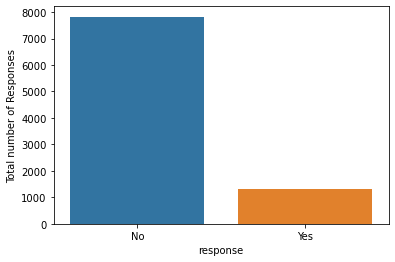

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(x = 'response', data=data)
plt.ylabel('Total number of Responses')
plt.show()

### Show a plot of the response rate by the sales channel.

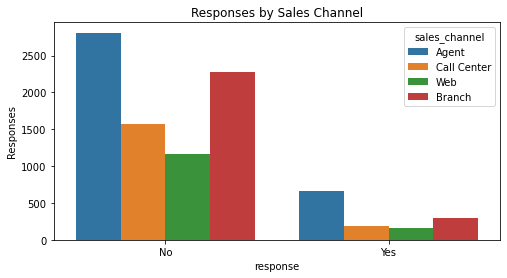

In [46]:
plt.figure(figsize=(8,4))
sns.countplot(x='response', hue='sales_channel', data=data)
plt.ylabel('Responses')
plt.title('Responses by Sales Channel')
plt.show()

### ~~Show a plot of the response rate by the total claim amount.~~ Show a plot of the distribution of the total claim amount, broken down by response kind. Try a boxplot and distribution plot, for each response kind. For the distribution plot, try to plot both kinds of responses in one chart (seaborns histplot, using the 'hue' parameter).

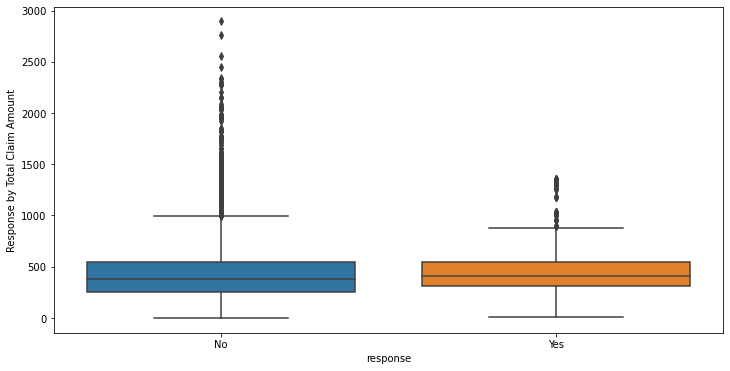

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(y='total_claim_amount' , x='response', data=data)
plt.ylabel('Response by Total Claim Amount')
plt.show()

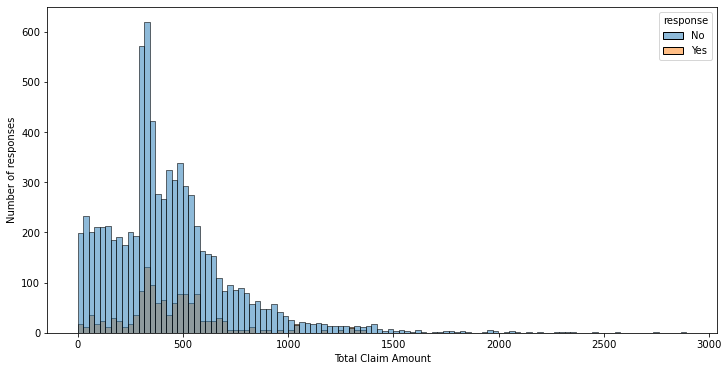

In [62]:
# we can work with
# plt.figure(figsize=(12,10))
# but we need a bit more freedom regarding placing the plot on our figure
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x='total_claim_amount' , hue='response', data=data, ax=ax)
plt.ylabel('Number of responses')
plt.xlabel('Total Claim Amount')
plt.show()

### ~~Show a plot of the response rate by income.~~ Create similar plots like in the task before, but for `Income`

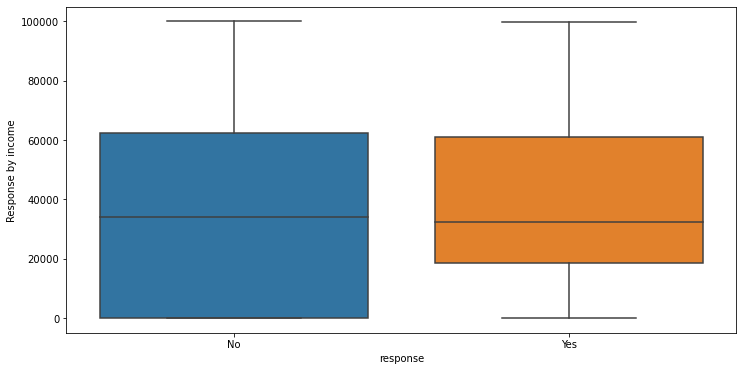

In [65]:
plt.figure(figsize=(12,6))
sns.boxplot(y='income' , x='response', data=data)
plt.ylabel('Response by income')
plt.show()

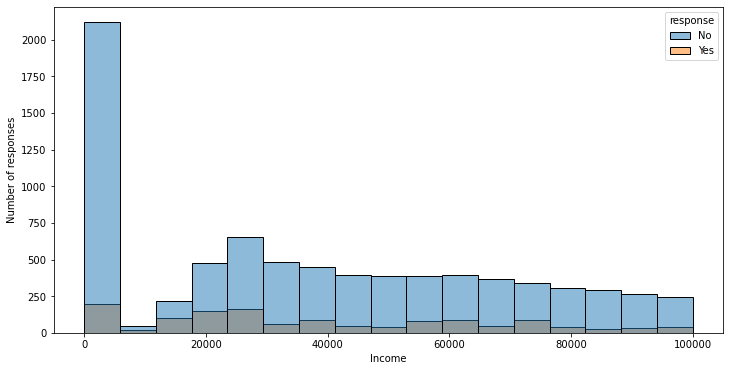

In [66]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x='income' , hue='response', data=data, ax=ax)
plt.ylabel('Number of responses')
plt.xlabel('Income')
plt.show()

# Create a scatterplot between 'total claim amount' and 'income'. Play around with the settings of the scatterplot (markersize?) and try to identify more features within the data just visually. You can also try different seaborn plots. Check: https://www.python-graph-gallery.com/134-how-to-avoid-overplotting-with-python

<AxesSubplot:xlabel='total_claim_amount', ylabel='income'>

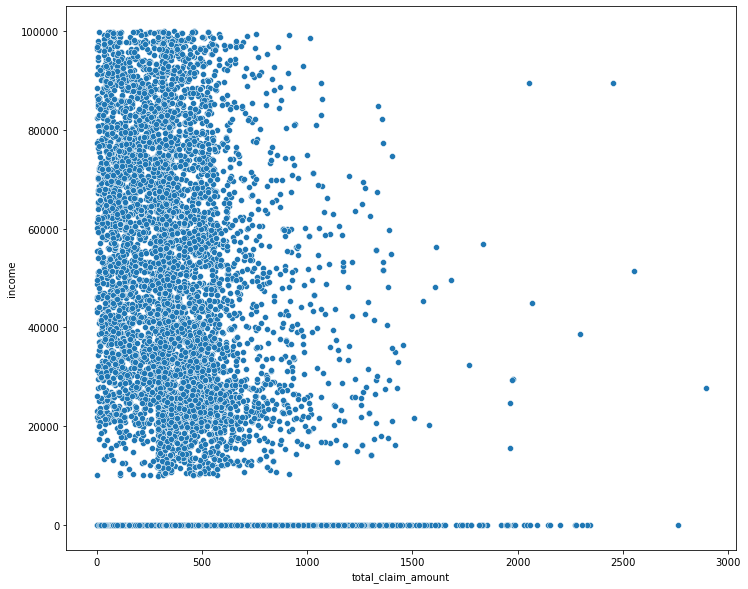

In [68]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(data=data,
                x='total_claim_amount',
                y='income',
               )

Markersizes are too big. It seems we have overplotted!

<AxesSubplot:xlabel='total_claim_amount', ylabel='income'>

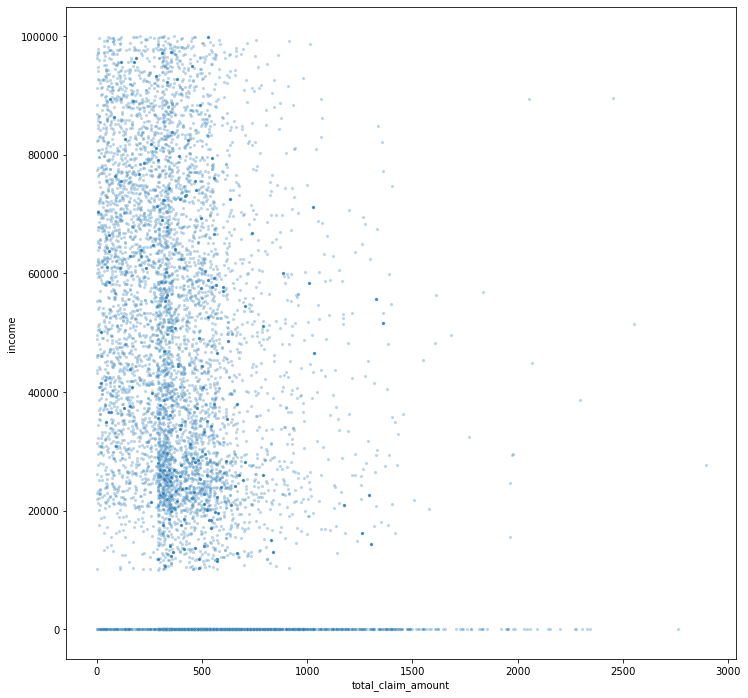

In [124]:
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(data=data,
                x='total_claim_amount',
                y='income',
                s=10,
                alpha=.3,
                ax=ax,
               )

And just by decreasing the markersize we found interesting features here, for example: Data seem to be more frequent near a total claim amount of 330. And also there seems to be a boundary regarding the income near 20,000$. These can be important leads for further data investigation (maybe not in this case, because these data might even be artificial). Let's mark those boundaries

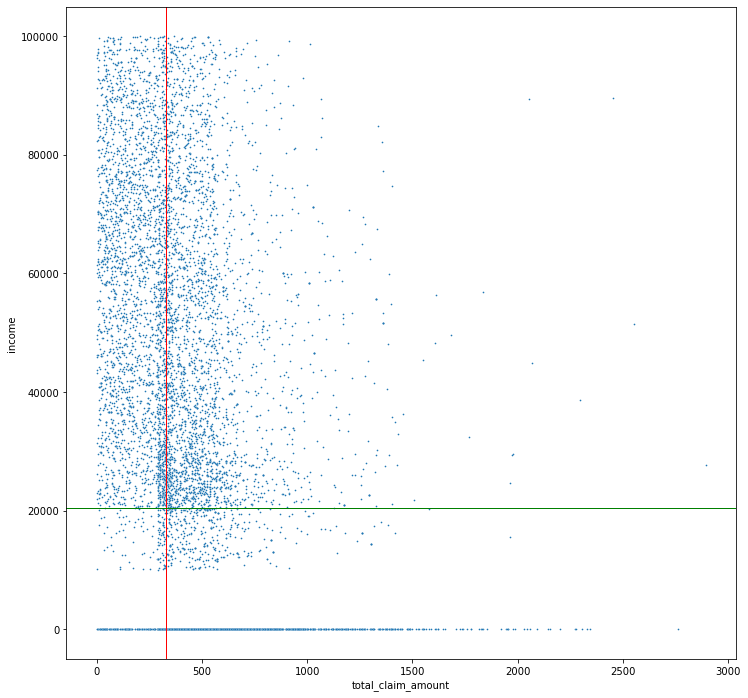

In [86]:
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(data=data,
                x='total_claim_amount',
                y='income',
                s=3,
                ax=ax,
               )
plt.axvline(x=330, linewidth=1, color='r')
plt.axhline(y=20500, linewidth=1, color='g')

Let's try another plot (if you google for something like "density plot seaborn", or look on https://www.python-graph-gallery.com/all-charts/ you'll find more)

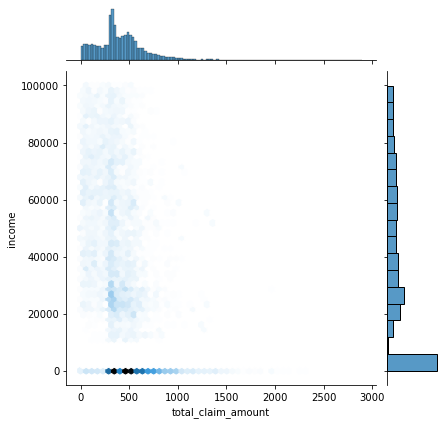

In [118]:
# this defines a dictionary which only contains settings to determine the hexagonal bin size of the
# following jointplot (play around with 'gridsize')
joint_kws=dict(gridsize=50)

sns.jointplot(data=data,
              x='total_claim_amount',
              y='income',
              kind='hex',  # provide the kind of jointplot
              joint_kws=joint_kws,  # parse the settings defined above 
             )

What we're trying to plot here is basically a 2-dimensional Histogram (check for example [here](https://www.python-graph-gallery.com/83-basic-2d-histograms-with-matplotlib) for more examples).

Let's do another one from **Matplotlib**: the `hist2d`, see the documentation [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist2d.html)

Text(0, 0.5, 'Income')

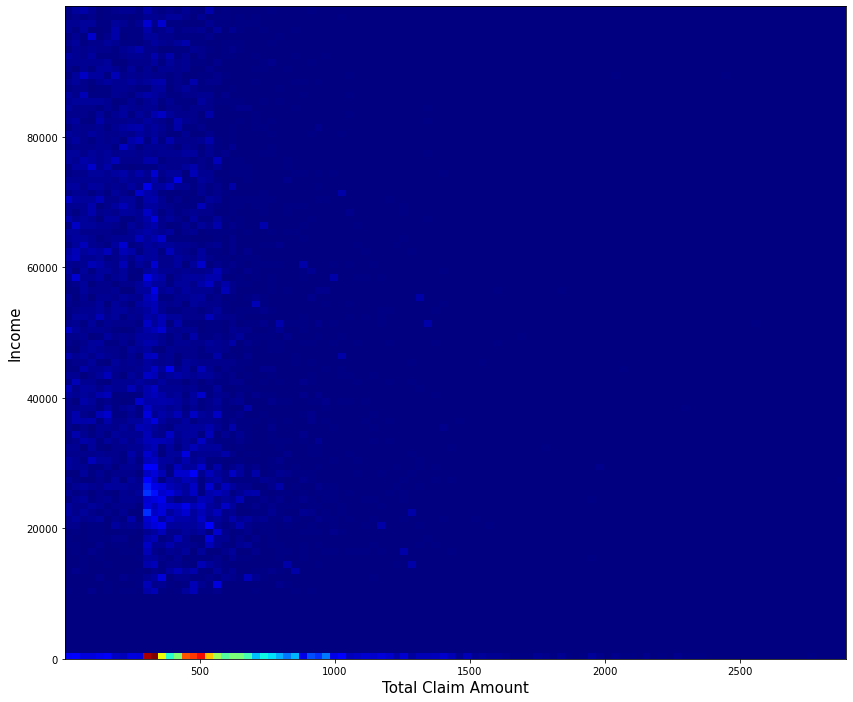

In [146]:
fig, ax = plt.subplots(figsize=(14,12))

ax = plt.hist2d(data['total_claim_amount'],
           data['income'],
           bins=(100,100),
           #density=True,
           cmap=plt.cm.jet,
          );
plt.xlabel('Total Claim Amount', size=15)
plt.ylabel('Income', size=15)

There are way more datapoints with Income = 0 than above. This is bad for our density plot, since its colorscale is set according to density. Let's therefore find a way to set the colorscale logarithmic. I just found this solution by googling, which led me to this [pyplot page](https://matplotlib.org/stable/gallery/scales/power_norm.html#sphx-glr-gallery-scales-power-norm-py). No one knows this from the top of their heads :-) And seaborn btw. has much handier solutions for this. Also later in the course, we will learn Tableau, where this is much easier to accomplish.

In [149]:
from matplotlib.colors import PowerNorm  # importing colormaps distributed according to a Powerlaw (not linear)
import matplotlib.colors as mcolors

Text(0, 0.5, 'Income')

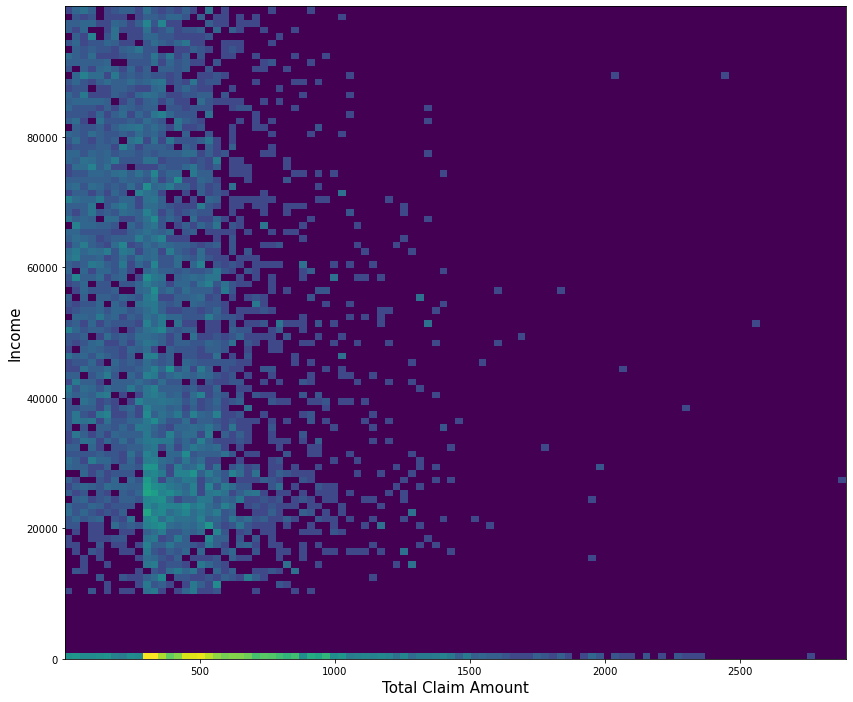

In [150]:
fig, ax = plt.subplots(figsize=(14,12))

ax = plt.hist2d(data['total_claim_amount'],
           data['income'],
           bins=(100,100),
           norm=mcolors.PowerNorm(0.3),  # set the power exponent to 0.3
                
          );
plt.xlabel('Total Claim Amount', size=15)
plt.ylabel('Income', size=15)

## Key takeaway here

* if you have lots of data to plot, definitely play around with the plot-style settings like **Markersize**, **alpha-level**, **logarithmic**-scaling, etc. ...  also try different kinds of density-plots.
* because if you don't, during your EDA process you might miss important leads which can lead to very relevant business insights!